<a href="https://colab.research.google.com/github/iwatobipen/3dfp/blob/master/plot_chemicalspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-4.5.1-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.1-Linux-x86_64.sh
!time bash ./Miniconda3-4.5.1-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2018-12-09 10:44:35--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.17.107.77, 104.17.111.77, 104.17.109.77, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.17.107.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58867856 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.1-Linux-x86_64.sh.1’

Miniconda3-4.5.1-Li 100%[===================>]  56.14M  71.1MB/s    in 0.8s    

2018-12-09 10:44:35 (71.1 MB/s) - ‘Miniconda3-4.5.1-Linux-x86_64.sh.1’ saved [58867856/58867856]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_0 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.0-h9df7e31_2 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.

In [0]:
import sys
import os
sys.path.append('/usr/local/lib/python3.6/site-packages/')

In [0]:
import pandas as pd
import numpy as np
import altair as alt

from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import RDConfig
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

from sklearn.decomposition import PCA


In [5]:
print(rdBase.rdkitVersion)

2018.09.1


In [0]:
moldf = PandasTools.LoadSDF(os.path.join(RDConfig.RDDocsDir, 'Book/data/cdk2.sdf'))
moldf['SMILES'] = moldf.ROMol.apply(Chem.MolToSmiles)

Cluster            ID MODEL.CCRATIO                  MODEL.SOURCE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
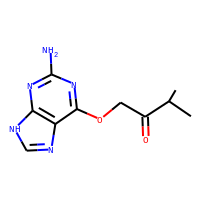
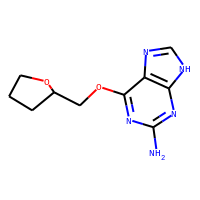

In [7]:
moldf.head(2)

In [0]:
def mol2fparr(mol):
    arr = np.zeros((0,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol,2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [0]:
pca = PCA(n_components=2)

In [10]:
X = np.asarray([mol2fparr(mol) for mol in moldf.ROMol])
print(X.shape)
res = pca.fit_transform(X)
print(res.shape)
moldf['PCA1'] = res[:,0]
moldf['PCA2'] = res[:,1]
moldf2 = moldf[['ID', 'PCA1', 'PCA2', 'SMILES' ]]
moldf2['Cluster'] = ["{:0=2}".format(int(cls)) for cls in moldf.loc[:,'Cluster']]

(47, 2048)
(47, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
alt.Chart(moldf2).mark_point().encode(
           x = 'PCA1',
           y = 'PCA2',
           color = 'Cluster',
           tooltip = ['ID', 'SMILES']).interactive()

Chart({
  data:               ID      PCA1      PCA2                                                             SMILES Cluster
  0   ZINC03814457  2.179482 -1.307285                                    CC(C)C(=O)COc1nc(N)nc2[nH]cnc12      01
  1   ZINC03814459  2.850680 -2.795289                                       Nc1nc(OCC2CCCO2)c2nc[nH]c2n1      02
  2   ZINC03814460  2.438624 -2.717656                                   Nc1nc(OCC2CCC(=O)N2)c2nc[nH]c2n1      02
  3   ZINC00023543  3.241061 -3.078867                                      Nc1nc(OCC2CCCCC2)c2nc[nH]c2n1      03
  4   ZINC03814458  2.986380 -2.813767                                     Nc1nc(OCC2CC=CCC2)c2nc[nH]c2n1      03
  5   ZINC01641925  2.054942  2.794129                                   Cn1cnc2c(NCc3ccccc3)nc(NCCO)nc21      03
  6   ZINC01649340  2.385827  3.468200                           CCC(CO)Nc1nc(NCc2ccccc2)c2ncn(C(C)C)c2n1      03
  7   ZINC01487345  1.894355  3.035712                        COc1ccc(CNc2nc(N(CCO)CCO)nc3c2ncn3C(C)C)cc1      03
  8   ZINC03814479  2.336787 -2.298001                                      Nc1nc(N)c(N=O)c(OCC2CCCCC2)n1      04
  9   ZINC03814467 -2.317997 -0.892284                              COc1ccc2c(c1)/C(=C/c1cnc[nH]1)C(=O)N2      05
  10  ZINC03814470 -2.922876 -1.331336                    COc1cc[nH]c1/C=C1\C(=O)Nc2ccc([N+](=O)[O-])cc21      05
  11  ZINC03814455  0.621407  1.036628                                  CCc1cnc(CSc2cnc(NC(=O)C(C)C)s2)o1      06
  12  ZINC03814464  0.413046  0.171573                                CCCCOc1c(C(=O)c2nccs2)cnc2[nH]ncc12      07
  13  ZINC00003491 -2.184112 -0.529728                           COc1cc(-c2ccc[nH]2)c2c3c(ccc(F)c13)NC2=O      08
  14  ZINC03814473 -1.859312 -0.552553                    [NH3+]CCSc1cc(-c2ccc[nH]2)c2c3c(ccc(F)c13)NC2=O      08
  15  ZINC03814477 -1.359618  2.085969                          NC(=O)Nc1cccc2c1C(=O)c1c-2n[nH]c1-c1cccs1      09
  16  ZINC03814468 -2.668856 -1.043023                      COc1ccc2c(c1)/C(=C/c1[nH]cc3c1CCOC3=O)C(=O)N2      10
  17  ZINC03814469 -2.970749 -1.261489             CNS(=O)(=O)c1ccc2c(c1)/C(=C/c1[nH]cc3c1CCNC3=O)C(=O)N2      10
  18  ZINC03814476 -1.458023  2.329317                         CC(=O)Nc1cccc2c1C(=O)c1c-2n[nH]c1-c1ccncc1      11
  19  ZINC00023904 -1.541466  2.322890                   COc1ccc(-c2[nH]nc3c2C(=O)c2c(NC(N)=O)cccc2-3)cc1      11
  20  ZINC03814475 -1.587264  2.580476              COc1ccc(-c2[nH]nc3c2C(=O)c2c(NC(=O)NN(C)C)cccc2-3)cc1      11
  21  ZINC03814452  1.168202  1.058097                                 Cc1nc2ccccn2c1-c1ccnc(Nc2ccccc2)n1      12
  22  ZINC03814454  1.387061  1.249659               Cc1nc2ccccn2c1-c1ccnc(Nc2ccc(OCC(O)C[NH+](C)C)cc2)n1      12
  23  ZINC03814449  0.063269  1.024598                                O=C(Nc1ccccn1)Nc1cccc2c1C1CCCN1C2=O      13
  24  ZINC03814441 -2.089428 -1.178241                     NS(=O)(=O)c1ccc(N/N=C2\C(=O)Nc3ccc(Br)cc32)cc1      14
  25  ZINC03814443 -2.937259 -0.688692                        CNS(=O)(=O)c1ccc(N/C=C2\C(=O)Nc3ccccc32)cc1      14
  26  ZINC04617747 -2.803158 -0.684626                   N=C(N)NS(=O)(=O)c1ccc(N/C=C2\C(=O)Nc3ccccc32)cc1      14
  27  ZINC03814440 -2.367895 -0.187555                      O=C1Nc2ccc(S(=O)(=O)O)cc2/C1=C1/Nc2ccccc2C1=O      15
  28  ZINC03814462  3.156025 -2.231488                            c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1      16
  29  ZINC00603011  2.665344 -3.088879                  NS(=O)(=O)c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1      16
  30  ZINC00023841  0.565397  0.533743                            O=C(c1ccccc1)c1cnc2n[nH]cc2c1OCc1ccccc1      17
  31  ZINC03814450 -0.783770 -0.564714           NS(=O)(=O)c1ccc(Nc2cc(-c3ccc([N+](=O)[O-])cc3)[nH]n2)cc1      18
  32  ZINC03814465  0.287972  0.170321                       CCCCOc1c(C(=O)c2c(F)cc(Br)cc2F)cnc2[nH]ncc12      19
  33  ZINC03814453  0.156667 -0.161817                     Cc1ccc(F)c(Nc2ccnc(Nc3ccc(S(N)(=O)=O)cc3)n2)c1     